<a href="https://colab.research.google.com/github/brugalbryan/Artificial-Intelligence/blob/main/Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/mixture.txt"

# Load to Python as a data frame
raw_data = pd.read_csv(url, sep=',')

#build a SVM model on the new training set
from sklearn.model_selection import train_test_split

In [ ]:
# Split the raw_data into training_data and test_data (20%)
training_data, test_data = train_test_split(raw_data, test_size=0.2)

In [ ]:
# kNN model
from sklearn.neighbors import KNeighborsClassifier
model_1nn = KNeighborsClassifier(n_neighbors=1)
model_1nn.fit(training_data[['x1', 'x2']], training_data['y'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
test_data["prediction"] = model_1nn.predict(test_data[["x1","x2"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
blue_pts = raw_data[raw_data['y'] == 0]
red_pts = raw_data[raw_data['y'] == 1]

In [ ]:
# How to evaluate the kNN model?

# Visualize the decision region.

# 1. create a 100 * 100 grid of points to cover the entire plane.
plot_data = pd.DataFrame()
x1_coordinates = np.linspace(-3, 4, 100) # sample 100 points per row
x2_coordinates = np.linspace(-2, 3, 100) # sample 100 rows (total: 100 * 100 = 10,000 points)
for x1 in x1_coordinates:
    for x2 in x2_coordinates:
        plot_data = plot_data.append({'x1': x1,
                               'x2': x2},
                              ignore_index=True)
plot_data

# 2. use the kNN model to make a prediction on each of the 10,000 points.
plot_data['prediction'] = model_1nn.predict(plot_data[['x1', 'x2']])
plot_data.head()

,x1,x2,prediction
0,-3.0,-2.000000,1
1,-3.0,-1.949495,1
2,-3.0,-1.898990,1
3,-3.0,-1.848485,1
4,-3.0,-1.797980,1


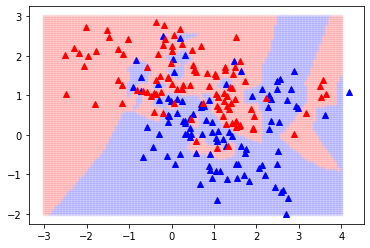

In [ ]:
# plot these points: points classified as 0 should be visualized as blue points,
# points classified as 1 should be visualized as red points.

test_data_blue = plot_data[plot_data['prediction'] == 0]
test_data_red = plot_data[plot_data['prediction'] == 1]
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.', alpha=0.1)
plt.plot(test_data_red['x1'], test_data_red['x2'], 'r.', alpha=0.1)
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b^', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r^', label='y = 1')

In [ ]:
test_data["knn1"] = model_1nn.predict(test_data[["x1","x2"]])
# Calculate the prediction accuracy on training data knn = 1.
accuracy_score(test_data['y'], test_data["knn1"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.725

In [ ]:
# kNN model
from sklearn.neighbors import KNeighborsClassifier
model_5nn = KNeighborsClassifier(n_neighbors=5)
model_5nn.fit(training_data[['x1', 'x2']], training_data['y'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
test_data["prediction"] = model_5nn.predict(test_data[["x1","x2"]])
test_data.head()

# 2. use the kNN model to make a prediction on each of the 10,000 points.
plot_data['prediction'] = model_5nn.predict(plot_data[['x1', 'x2']])
# plot_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


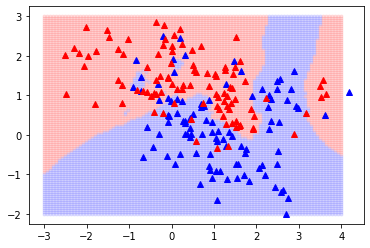

In [ ]:
# 3. plot these points: points classified as 0 should be visualized as blue points,
#   points classified as 1 should be visualized as red points.

test_data_blue = plot_data[plot_data['prediction'] == 0]
test_data_red = plot_data[plot_data['prediction'] == 1]
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.', alpha=0.1)
plt.plot(test_data_red['x1'], test_data_red['x2'], 'r.', alpha=0.1)
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b^', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r^', label='y = 1')


In [ ]:
test_data["knn5"] = model_5nn.predict(test_data[["x1","x2"]])
# Calculate the prediction accuracy on training data knn = 5.
accuracy_score(test_data['y'], test_data["knn5"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.85

In [ ]:
# kNN model
from sklearn.neighbors import KNeighborsClassifier
model_25nn = KNeighborsClassifier(n_neighbors=25)
model_25nn.fit(training_data[['x1', 'x2']], training_data['y'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
test_data["prediction"] = model_25nn.predict(test_data[["x1","x2"]])
test_data.head()

# 2. use the kNN model to make a prediction on each of the 10,000 points.
plot_data['prediction'] = model_25nn.predict(plot_data[['x1', 'x2']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


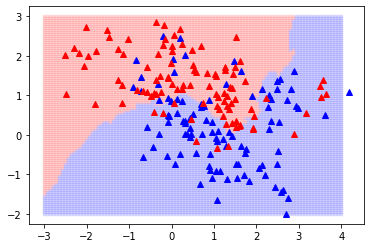

In [ ]:
# 3. plot these points: points classified as 0 should be visualized as blue points,
#   points classified as 1 should be visualized as red points.

test_data_blue = plot_data[plot_data['prediction'] == 0]
test_data_red = plot_data[plot_data['prediction'] == 1]
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.', alpha=0.1)
plt.plot(test_data_red['x1'], test_data_red['x2'], 'r.', alpha=0.1)
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b^', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r^', label='y = 1')

In [ ]:
test_data["knn25"] = model_25nn.predict(test_data[["x1","x2"]])
# Calculate the prediction accuracy on training data knn = 25.
accuracy_score(test_data['y'], test_data["knn25"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.775